<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Jorge González Perea
</h3>
    
<h3 style="text-align:center">
    12/11/2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido obtener todo lo que piden los enunciados de manera que mis resultados son exactamente iguales a los test de funcionamiento proporcionados, pero no he podido (en determinados apartados) relacionar ciertas variables (claves y valores de diccionarios, listas, etc.) para obtener índices que proporcionen los datos necesarios, teniendo que hacer uso de variables o funciones creadas en otros ejercicios.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 10 sobre 10.
</font>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Librerías:
import csv
import copy
import collections as cll
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import plotly_express as px

In [2]:
# Constantes globales:
MOVIES_DATA = "movie_data.csv"
# Esta celda debe ser completada por el estudiante

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `csv`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
# Esta celda debe ser completada por el estudiante
def load_full_data(file):
    """
    Loads a .csv file and returns the header and data
    separately.
    
    Parameters:
    -----------
    file: string
        .csv file with the data to load.
    
    Precondition:
    -------------
    extension(file) == '.csv'

    Returns:
    --------
    header: list
        list of strings with header titles.
    rows: list
        list with any type of data.
    
    Example:
    --------
    >>> load_full_data('movies.csv')
    (['movie1', 'movie2', ...] ,
    [data_movie1, data_movie2, ...])
    """

    ### Se comprueba que el argumento es un archivo .csv:
    assert type(file) == str
    if file[-4:len(file)] == '.csv':
        iscsv = True
    else:
        iscsv = False
    assert iscsv == True, "Not a .csv file"

    ### Lectura de los datos:
    with open(file, 'r', encoding = 'utf8') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)
        rows = [line for line in csvreader]
    return header, rows

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

<br>

<font color = "darkblue">

La función `load_full_data()` se ha desarrollado mediante la librería `csv`. En primer lugar se ha definido una función llamada `iscsv()` dentro de la principal, que permite comprobar si los últimos 3 elementos de la cadena de caracteres introducida se corresponden con la extensión .csv para comprobar que se carga un archivo correcto. Por último, con el condicional `with` se abre el archivo deseado y se almacena la primera fila de datos en una variable `header` y el resto en `rows`, que son las variables que se devuelven.

<br>

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
# Esta celda debe ser completada por el estudiante

def header_pos(file):
    """
    Returns the column position of each header on a given
    .csv file.

    Parameters:
    -----------
    file: string
        .csv file with the data to load.

    Returns:
    --------
    headers: list
        list of tuples with header position and titles.
    
    Example:
    --------
    >>> load_full_data('movies.csv')
    
    [(0, 'header1'), (1, 'header2'), ...] ,
    """

    full_header = load_full_data(file)[0]
    headers_and_positions = [(i, full_header[i]) for i in range(0, len(full_header))]
    return headers_and_positions

list_of_headers = header_pos(MOVIES_DATA)

In [6]:
# Test de funcionamiento
print(list_of_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


<br>

<font color = "darkblue">

La función `header_pos` carga de nuevo los datos recogidos en el archivo argumentado por diversos motivos:
- Evita tener que definir otra constante global, pudiendo hacer uso de `MOVIES_DATA`.
- Aprovecha las líneas de código de la función `load_full_data` del anterior apartado que comprueban la validez del argumento introducido.
- Volver a leer los datos desde cero permite poder usar la función `header_pos` sin antes definir una variable que icluya las cabeceras con `load_full_data(MOVIES_DATA)[0]`. Es decir, permite obtener la información en menos líneas de código o directamente. Por ejemplo: se pueden obtener las cabeceras y sus posiciones sin tener que ejecutar las celdas anteriores.

Por este motivo, en las funciones de este documento que no requieran hacerlo de otra manera, se utiliza la variable `MOVIES_DATA` como argumento y se cargan los datos de nuevo.

<br>

### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
# Esta celda debe ser completada por el estudiante
def main_data_from_item(data_list):

    """
    Extracts certain columns of interest from a list of strings
    wich are column headers.

    Parameters:
    -----------
    data_list: list
        list of strings to extract data from.
    
    Returns:
    --------
    new_data: list
        new list containing only the desired data.
    
    Example:
    --------
    >>> main_data_from_item(['color', 'director_name', ..., 'title_year', 'actor_2_facebook_likes',
                        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'])

        ['movie_title', 'title_year', ..., 'imdb_score', 'movie_imdb_link']
    """


    wanted_columns = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']
    full_header = load_full_data(MOVIES_DATA)[0]
    pos=[full_header.index(col) for col in wanted_columns]
    new_data = [data_list[i] for i in pos]
    return new_data

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


<br>

<font color = "darkblue">

Para este apartado se ha definido una función que compara la lista asociada a la cabecera del archivo de datos (`full_header`) con una lista que contiene las columnas que se desean extraer (`wanted_columns`), y mediante el método `full_header.index(wanted_columns)` se extraen los índices de las posiciones correspondientes a las cadenas de la primera que también se encuentran en la segunda.

NOTA: la lista que incluye las columnas que se quieren extraer (llamada `wanted columns`) no es un parámetro de la función `main_data_from_item()` porque en el test de funcionamiento no viene así indicado, por lo que se crea como variable dentro de la función.

<br>

### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
# Esta celda debe ser completada por el estudiante

def datatypes_arranged(data_list):
    """
    Returns the same list with certain changes to the contained strings.

    Parameters:
    -----------
    data_list: list
        list with information about a movie in the form of strings.
    
    Returns:
    --------
    new_data_list: list
        new list with the same information with some fixed errors.

    Example:
    --------
    >>> datatypes_arranged(main_data_from_item(load_full_data[1][0]))

    ['Avatar', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/']
    """
    new_data_list = copy.deepcopy(data_list)
    
    ### Title ###
    new_data_list[0] = new_data_list[0].rstrip()

    ### URL ###
    new_data_list[-1] = new_data_list[-1].strip('?ref_=fn_tt_tt_1')

    ### Numeric data ###
    wanted_columns = ['title_year', 'budget', 'imdb_score']
    list_of_headers = main_data_from_item(load_full_data(MOVIES_DATA)[0])
    pos = [list_of_headers.index(col) for col in wanted_columns]
    for k in pos:
        if new_data_list[k] == '':
            new_data_list[k] = -1

    return new_data_list

In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, '7.1', 'http://www.imdb.com/title/tt5289954/']


<br>

<font color = "darkblue">

En este apartado se pide corregir 3 tipos de datos. Para ello, lo primero que hace la función `datatypes_arraged()` es copiar la lista introducida como parámetro (`data_list`) para trabajar sobre una nueva (`new_data_list`) sin alterar los datos originales en el caso de que se quieran utilizar. Los campos corregidos son los siguientes:

- Para corregir la anomalía del título de la película se ha utilizado el método `.rstrip` para quitar todos los espacios en blanco a la derecha de la cadena de caracteres, ya que la cadena `'\xa0'` representa un espacio en blanco en Unicode.

- Para la dirección URL de cada película se ha empleado el mismo método para eliminar la secuencia `'/?ref_=fn_tt_tt_1'` de todos los enlaces.

- Por último, para los datos numéricos se ha empleado un bucle similar al del apartado anterior para econtrar los índices de posición de los campos `['title_year', 'budget', 'imdb_score']` comparándolo con el encabezado original, que son las cadenas que realmente contienen datos numéricos. En el caso de que uno de ellos fuera una `str` vacía se sustituye por `-1` (valor entero).

<br>

### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
# Esta celda debe ser completada por el estudiante

def colors_set(file_name):
    """
    Returns the set containing every posible color category for a movie.
    
    Parameters:
    -----------
    file_name: str
        name of the loaded file containing information about movies.
    
    Returns:
    --------
    set(color): set
        set containing the different options for the header 'color'.

    Example:
    --------
    >>> colores_conj(movie_data.csv)

    {'', 'Color', 'Black and White'}
    """
    full_header, full_list_data = load_full_data(file_name)
    color_pos = full_header.index('color')
    color = [movie[color_pos].strip() for movie in full_list_data]
    return set(color)
colores = colors_set(MOVIES_DATA)



def title_and_reviews(file_name, title_string):
    """
    Parameters:
    -----------
    file_name: str
        name of the file to check for 'movie_title' containing the string title_string

    Returns:
    --------
    string_titles_and_reviews: list
        list containing tuples with 'movie_title' and 'num_critic_for_reviews' for each movie whose title contains title_string

    Example:
    --------
    >>> title_and_reviews(movie_data.csv, "Victor")

    [('Victor Frankenstein', '159'), ('Victor Frankenstein', '159'), ('The Young Victoria', '188'), ('Victor Frankenstein', '159'), ('Raising Victor Vargas', '59')]
    """

    full_header, full_list_data = load_full_data(file_name)
    
    wanted_columns = ['movie_title', 'num_critic_for_reviews']
    titles_pos, reviews_pos = [full_header.index(string) for string in wanted_columns]
    wrong_titles = [movie[titles_pos] for movie in full_list_data]
    reviews = [movie[reviews_pos] for movie in full_list_data]

    string_titles_and_reviews = []
    for i in range(0, len(wrong_titles)):
        if title_string in wrong_titles[i]:
            string_titles_and_reviews.append((wrong_titles[i].strip(), reviews[i]))
    return string_titles_and_reviews

pelis_victor = title_and_reviews(MOVIES_DATA, "Victor")

In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', 'Color', 'Black and White'}
[('Victor Frankenstein', '159'), ('Victor Frankenstein', '159'), ('The Young Victoria', '188'), ('Victor Frankenstein', '159'), ('Raising Victor Vargas', '59')]


<br>

<font color = "darkblue">

Obtener el conjunto de las posibles opciones para la columna de colores es muy sencillo: basta con buscar y extraer la columna correspondiente al encabezado `'color'` y utilizar la función `set()` sobre ella.

Para extraer todos los títulos que contienen una cierta cadena `title_string` junto con la cantidad de valoraciones que han tenido se ha desarrollado la función `title_and_reviews()` con un bucle que encuentra la posición de los campos `'movie_title'` y `'num_critic_for_reviews'` en el archivo cargado (`file_name`). Después, otro bucle compara todos los títulos con la cadena introducida generando un `bool` y, si este es `True` se introduce la tupla `('movie_title, 'num_critic_for_reviews')` en la lista devuelta por la función.
<br>

# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
# Esta celda debe ser completada por el estudiante
def load_main_data(file_name, values_header = False):
    """
    Loads a .csv file and extracts the desired columns in the form of a header and a set of lists.

    Parameters:
    -----------
    file_name: str
        str with the name of the .csv file

    Returns:
    --------
    full_header: list
        list of strings corresponding to the headers.
    movies: set
        set of lists containing information about a movie.

    Example:
    --------
    >>> list(load_main_data(movie_data.csv).values())[0]

    ('Avatar', '2009')  ->  ['Color', 'James Cameron', 'CCH Pounder', 'http://www.imdb.com/title/tt0499549', 'English', 'USA', '237000000', '7.9']
    """
    ### Se comprueba que el argumento es un archivo .csv:
    assert type(file_name) == str
    if file_name[-4:len(file_name)] == '.csv':
        iscsv = True
    else:
        iscsv = False
    assert iscsv == True, "Not a .csv file"

    wanted_columns = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']
    movies = {}
    
    with open(file_name, 'r', encoding = 'utf8') as file:
        csvreader = csv.reader(file)
        full_header = next(csvreader)
        
        title_pos, year_pos = [full_header.index(i) for i in ['movie_title','title_year']]
        values = [column for column in wanted_columns if column not in [full_header[title_pos], full_header[year_pos]]]

        numeric_data = ['title_year', 'budget', 'imdb_score']
        numeric_data_pos = [full_header.index(i) for i in numeric_data]
        
        link_pos = full_header.index('movie_imdb_link')

        for line in csvreader:
            line[link_pos] = line[link_pos].strip('?ref_=fn_tt_tt_1')

            for i in numeric_data_pos:
                if line[i] == '':
                    line[i] = -1

            movies[(line[title_pos].rstrip(), line[year_pos])] = [line[i] for i in [full_header.index(etiqueta) for etiqueta in values]]
    return wanted_columns, movies

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', '2009')  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", '2007')  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', '300000000', '7.1', 'http://www.imdb.com/title/tt0449088/']
('Spectre', '2015')  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', '245000000', '6.8', 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', '2012')  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', '250000000', '8.5', 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, '7.1', 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Esta celda debe ser completada por el estudiante

del full_list_data

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


<br>
<font color = "darkblue">

La función `load_main_data` lleva a cabo muchas instrucciones:

- En primer lugar, se comprueba si el archivo introducido es de tipo .csv.

- Posteriormente se crea una lista que contiene en forma de cadenas de carcteres los elementos de la cabecera que se quieres extraer (título, año, etc.), así como un diccionario vacío llamado `movies` que tendrá como clave la tupla `('movie_title', 'title_year')` y como valores tendrá listas con el resto de columnas en `wanted_columns`.

- A continuación se abre el archivo para leerlo y se guarda la cabecera en laq variable `full_header`.

- Las siguientes 5 líneas de código sirven para lo siguiente:

    - La dos primeras (líneas 39 y 40 en la celda de código) sirven para identificar el índice de posición de los títulos y años de las películas en `full_header` (que serán las claves) y para crear una nueva variable llamada `values`, que contiene la misma información que `wanted_colums` pero sin el título y año.

    - Las dos líneas siguientes (41 y 42) hacen algo parecido para identificar los datos numéricos que se quieren cambiar por el valor entero `-1` en caso de no existir.

    - La quinta línea (44) localiza la posición del enlace para más tarde poder eliminar los caracteres indeseados.

- Por último se recorre el archivo línea por línea, corrigiendo los datos que se encuentras en las posiciones `title_pos`, `numeric_data_pos` o `link_pos` y almacenando todo en el diccionario `movies`, en el que se crean una clave y un valor nuevos por cada línea leída.

<br>

### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
# Esta celda debe ser completada por el estudiante
def movies_anno_for_director(dictionary, director_name):
    """
    Returns every movie and the year it released in based on director's name.

    Parameters:
    -----------
    dictionary: dict
        dictionary containing the data. Keys must be ('movie_title', 'title_year').
    director: str
        Director's name.
    
    Returns:
    --------
    movies: list
        list of tuples with dictionary.keys() corresponding to director_name
    
    Example:
    --------
    >>> movies_anno_for_director(main_dict_data, "James Cameron")

    [('Avatar', '2009'),
    ('Titanic', '1997'),
    ('Terminator 2: Judgment Day', '1991'),
    ('True Lies', '1994'),
    ('The Abyss', '1989'),
    ('Aliens', '1986'),
    ('The Terminator', '1984')]
    """

    assert type(director_name) == str, (str(director_name) +" is not a valid director's name.")
    assert type(dictionary) == dict, ("Not a dictionary of movies.")

    movies = [list(dictionary.keys())[i] for i in range(len(list(dictionary.values()))) if director_name in list(dictionary.values())[i]]
    return movies

In [18]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', '2009'),
 ('Titanic', '1997'),
 ('Terminator 2: Judgment Day', '1991'),
 ('True Lies', '1994'),
 ('The Abyss', '1989'),
 ('Aliens', '1986'),
 ('The Terminator', '1984')]

<br>
<font color = "darkblue">

Para obtener las claves asociadas a un director (cuyo nombre es la cadena `director_name`) basta con recorrer la lista formada con el método `list(dictionary.values())` y comprobar si en cada valor (es decir, en cada 'sublista') está contenida la cadena `director_name`. Si es así, la clave asociada a esta se convierte en una lista para poder ser manipulada y se extrae el único elemento de dicha lista: `list(dictionary.keys())[i]`.
<br>

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies(dictionary):
    """
    Returns the name of the director with higher directed movies in dictionary.
    
    Parameters:
    -----------
    dictionary: dict
        dictionary containing the data. Keys must be ('movie_title', 'title_year').

    Returns:
    --------
    max_director: tuple
        name of the director with the most movies and number of movies.
    
    Example:
    --------
    >>> directors_max_movies(main_dict_data)

    ('Steven Spielberg', 26)
    """
    list_of_directors = {}
    for movie in dictionary.values():
        if movie[0] in list_of_directors:
            list_of_directors[movie[0]] += 1
        else:
            list_of_directors[movie[0]] = 1
    del list_of_directors['']

    max_index = list(list_of_directors.values()).index(max(list_of_directors.values()))
    max_director = list(list_of_directors.items())[max_index]
    return max_director

In [20]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

('Steven Spielberg', 26)


<br>
<font color = "darkblue">

En este caso ha sido necesario crear un diccionario vacío (`list_of_directors`) en el que ir introduciendo nuevos directores como claves. Si el director ya se encuentra en el diccionario, se aumenta en una unidad la cuenta de películas. Si por el contrario es la primera aparción del director en el bucle, se le asigna el valor 1 a su cuenta. Además, tras el bucle es necesario eliminar el dato cuya clave (director) es la cadena `''`, ya que se corresponde con 102 películas para las que no hay datos sobre el director en el archivo `movie_data.csv`. Por último se ha localizado el índice de posición del mayor número de películas dirigidas con el método `.index(max(...))` y se ha devuelto el dato correspondiente.
<br>

- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
# Esta celda debe ser completada por el estudiante

def years_num_movies(dictionary, year1, year2):
    """
    Returns a dicctionary with the number of movies for every year between year1 and year2.

    Parameters:
    -----------
    dictionary: dict
        dicctionary with keys ('movie_title', 'title_year').
    
    year1: int
        left limit of interval.

    year2: int
        right limit of interval.
    
    Returns:
    --------
    year_dict: dict
        dictionary with keys year (int).

    Example:
    >>> years_num_movies(main_doct_data, 2000, 2003)

    {2003: 169, 2001: 183, 2002: 204, 2000: 169}
    """
    year_list = [movie[1] for movie in list(dictionary.keys())]
    year_dict = {}
    for year in year_list:
        year = int(year)
        if year >= year1 and year <= year2:
            if year in year_dict:
                year_dict[year] += 1
            else:
                year_dict[year] = 1
    return year_dict

In [22]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


<br>
<font color = "darkblue">

Para obtener el número de películas de cada año en el intervalo `[year1, year2]` se ha creado una lista con todos los años disponibles en el diccionario `main_dict_data` llamada `year_list`, así como un diccionario vacío llamado `year_dict`. Empleando el mismo método que en el apartado anterior para obtener el director con mayor número de películas dirigidas, se recorre esta lista con un bucle for: si el año en el que está situado el bucle está dentro del intervalo establecido, se introduce en el nuevo diccionario y se le asigna un contador de películas (inicializado como 1). Si este año ya se encuentra en el diccionario, se aumenta el contador en una unidad. Esto se consigie utilizando la variable iterativa `year` como clave del diccionario (igual que en el apartado anterior como ya se ha mencionado).

<br>

In [23]:
# Esta celda debe ser completada por el estudiante
num_movies_sorted = [(year, num_movies[year]) for year in sorted(list(num_movies.keys()))]

In [24]:
# Test de funcionamiento
    
print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


<br>
<font color = "darkblue">

Para ordenar los años en orden ascendente basta con crear una lista de tuplas en las que el primer elemento es el año y el segundo elemento es el número de películas. Esto se puede conseguir de forma rápida y en una línea mediante la notación intensional

<br>

- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
avatar = list(main_dict_data.items())[0]
avatar[1]

['James Cameron',
 'CCH Pounder',
 'English',
 'USA',
 'Color',
 '237000000',
 '7.9',
 'http://www.imdb.com/title/tt0499549/']

In [26]:
# Esta celda debe ser completada por el estudiante
def store_file(dictionary, txt_file_name):
    """
    Creates a .txt file with information about each movie.

    Parameters:
    -----------
    dictionary: dict
        dictionary of data
    
    text_file_name: str
        name of the file to create
    """
    movies = list(dictionary.items())
    wanted_data = ['movie_title', 'title_year', 'language', 'country', 'budget']
    wanted_data_index = [0, 1, 4, 5, 7]

    new_data = []
    for movie in movies:
        key = list(movie[0])
        value = movie[1]
        for i in value:
            key.append(i)
        new_data.append(key)
        
    with open(txt_file_name, 'w') as file:
        for movie in new_data:
            file.write('|'.join([str(movie[i]) for i in wanted_data_index]) + '\n')
    return
FEW_FIELDS = "algunos_campos.txt"

In [27]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FC69-A0AA

 Directorio de c:\Users\jorge\Desktop\M�ster\M�dulo 2 - Programaci�n Python\Programaci�n Python - Tarea\Gonzalez_Perea_Jorge

11/12/2024  19:07           210.839 algunos_campos.txt
               1 archivos        210.839 bytes
               0 dirs  768.608.505.856 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



<br>
<font color = "darkblue">

Para poder escribir un archivo en el que en cada línea se lea 'Título|Año|Idioma|País|Presupuesto' se han juntado toda la información sobre cada película en una lista llamada `new_data`, que no es más que los elementos en las posiciones que contiene `wanted_data_index` de una lista formada por los elementos de cada clave (`key`) y su valor correspondiente (`value`).

El archivo se escribe con `with open()` y en cada línea se escribe una cadena formada con el método `.join` aplicado al separador pedido (sin olvidar el salto de línea).

<br>

### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los números contabilizados.

In [28]:
# Esta celda debe ser completada por el estudiante
def actor_directors(dictionary):
    """
    Returns a defaultdict of actors as keys, each one assigned to a defaultdict of directors.
    
    Parameters:
    -----------
    dictionary: dict
        dictionary of data.
    
    Returns:
    --------
    dict_of_actors: collections.defaultdict
        defaultdict with actors assigned to another defaultdict of directors containing the number of collaborations between them.

    Example:
    >>> acto_directors(main_dict_data)

    defaultdict(dict,
            {'CCH Pounder': defaultdict(int,
                         {'James Cameron': 1,
                          'Peter Hyams': 1,
    ...
    """
    movies = list(dictionary.values())
    list_of_actors = [movie[2] for movie in movies]

    dict_of_actors = cll.defaultdict(cll.defaultdict)

    for actor in list_of_actors:
        dict_of_actors[actor] = cll.defaultdict(int)
        for movie in movies:
            if actor in movie:
                dict_of_actors[actor][movie[1]] += 1

    return dict_of_actors


In [29]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

n = 2
first_n_languages = dict( list(num_collaborations.items())[:n])
print(first_n_languages)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

{'English': defaultdict(<class 'int'>, {'CCH Pounder': 4, 'Johnny Depp': 36, 'Christoph Waltz': 4, 'Tom Hardy': 11, 'Daryl Sabara': 2, 'J.K. Simmons': 29, 'Brad Garrett': 2, 'Chris Hemsworth': 14, 'Alan Rickman': 8, 'Henry Cavill': 7, 'Kevin Spacey': 22, 'Giancarlo Giannini': 1, 'Peter Dinklage': 12, 'Will Smith': 19, 'Aidan Turner': 4, 'Emma Stone': 11, 'Mark Addy': 3, 'Christopher Lee': 8, 'Naomi Watts': 14, 'Leonardo DiCaprio': 20, 'Robert Downey Jr.': 26, 'Liam Neeson': 27, 'Bryce Dallas Howard': 6, 'Albert Finney': 2, 'Hugh Jackman': 18, 'Steve Buscemi': 26, 'Glenn Morshower': 3, 'Bingbing Li': 2, 'Tim Holmes': 1, 'Jeff Bridges': 17, 'Joe Mantegna': 7, 'Ryan Reynolds': 16, 'Tom Hanks': 24, 'Christian Bale': 20, 'Jason Statham': 25, 'Peter Capaldi': 1, 'Jennifer Lawrence': 15, 'Benedict Cumberbatch': 7, 'Eddie Marsan': 2, 'Jake Gyllenhaal': 15, 'Charlie Hunnam': 5, 'Harris

<br>
<font color = "darkblue">

En este apartado se ha llevado a cabo el siguiente proceso:

- Se ha creado una lista con todas las películas con el método `.values()` y una con todos los actores posibles.

- Se ha creado un diccionario de tipo `collections.defaultdict` cuyas claves serán los nombres de actores. Este es el diccionario principal.

- A cada actor en la lista de actores se le asigna un diccionario por defecto que contiene valores enteros. Este es el 'subdiccionario'.

- Se recorre la lista de películas y, si el actor del bucle superior aparece en alguna, se suma una unidad al valor del 'subdiccionario' con clave `[movie[1]]` (que es el nombre del director). Como es un diccionario por defecto de la librería `collections`, no hace falta comprobar si la clave y su valor ya están dentro del 'subdiccionario' o no.

<br>

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [30]:
# Esta celda debe ser completada por el estudiante

actors = list(num_collaborations.keys())
actor_collabs = [list(collab.items()) for collab in list(num_collaborations.values())]

minimum = 5
for actor in actors:
    collaborations = actor_collabs[actors.index(actor)]
    print_collabs = []
    for collab in collaborations:
        if collab[1] >= minimum:
            print_collabs.append(collab)
    if print_collabs != []:
        print(actor, '  ->  ', print_collabs)

English   ->   [('Johnny Depp', 36), ('Tom Hardy', 11), ('J.K. Simmons', 29), ('Chris Hemsworth', 14), ('Alan Rickman', 8), ('Henry Cavill', 7), ('Kevin Spacey', 22), ('Peter Dinklage', 12), ('Will Smith', 19), ('Emma Stone', 11), ('Christopher Lee', 8), ('Naomi Watts', 14), ('Leonardo DiCaprio', 20), ('Robert Downey Jr.', 26), ('Liam Neeson', 27), ('Bryce Dallas Howard', 6), ('Hugh Jackman', 18), ('Steve Buscemi', 26), ('Jeff Bridges', 17), ('Joe Mantegna', 7), ('Ryan Reynolds', 16), ('Tom Hanks', 24), ('Christian Bale', 20), ('Jason Statham', 25), ('Jennifer Lawrence', 15), ('Benedict Cumberbatch', 7), ('Jake Gyllenhaal', 15), ('Charlie Hunnam', 5), ('Harrison Ford', 27), ('Kelly Macdonald', 5), ('Oliver Platt', 10), ('Robin Wright', 10), ('Channing Tatum', 18), ('Jim Broadbent', 16), ('Amy Poehler', 8), ('Chloë Grace Moretz', 11), ('Jet Li', 6), ('Jimmy Bennett', 8), ('Tom Cruise', 24), ('Joseph Gordon-Levitt', 17), ('Scarlett Johansson', 20), ('Angelina Jolie Pitt', 15), ('Gary Old

# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [31]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(lista, rotulos = []):
    """
    Representa una lista de pares de tipo [(x, y)] en sus ejes correspondientes.

    Parameters:
    -----------
    lista: list
        lista de tuplas en la que cada una contiene una coordenada x y otra y.
    
    rotulos: list
        lista de cadenas de caracteres que contiene (en orden) título, etiqueta vertical y etiqueta horizontal.

    Returns:
    --------
    matplotlib.figure.Figure
    """
    assert type(rotulos) == list, "Rótulos no válidos."
    grafica = plt.figure(figsize=(7.5,4))
    x = [x[0] for x in lista]
    y = [y[1] for y in lista]
    plt.plot(x, y)
    plt.grid()
    plt.xticks(np.arange(np.min(x), np.max(x) + 1), rotation = 60)
    if rotulos != []:
        grafica.suptitle(str(rotulos[0]), fontsize = 13)
        plt.ylabel(str(rotulos[1]), fontsize = 13)
        plt.xlabel(str(rotulos[2]), fontsize = 13)
    plt.show()
    return

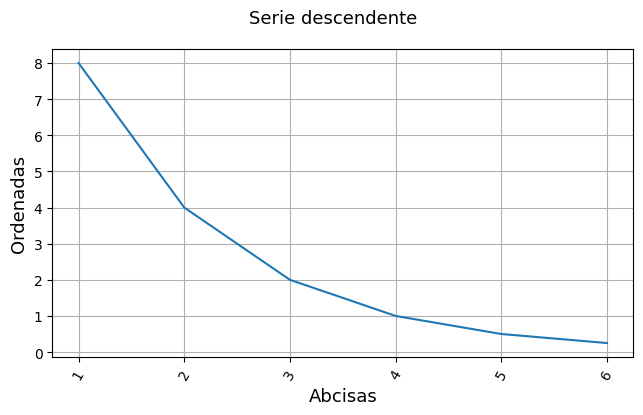

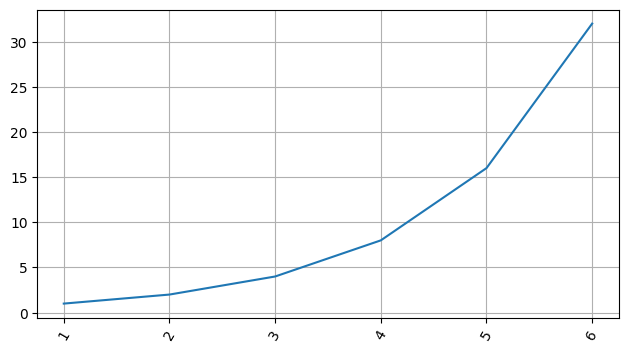

In [32]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

<br>
<font color = "darkblue">

En la función `representar_xxx_yyy` se ha escogido el elemento en la posición 0 como la coordenada X del punto y el elemento en la posición 1 como la coorenada Y. Posteriormente se han utilizado varias funciones de la librería `matplotlib.pyplot` para modificar la apariencia de la gráfica (etiquetas de ejes, cuadrícula, rótulos, etc.).

<br>

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [33]:
# Esta celda debe ser completada por el estudiante

def repr_movies_years(dicctionary, year1, year2):
    list_of_years = [movie[1] for movie in list(main_dict_data.keys())]
    interval = list(range(year1, year2 + 1))
    number_of_movies = [list_of_years.count(str(year)) for year in interval]
    graph = plt.figure(figsize=(7.5, 4))
    plt.plot(interval, number_of_movies)
    plt.grid()
    graph.suptitle('Number of movies in our database', fontsize = 13)
    plt.ylabel('num. movies in a year', fontsize = 13)
    plt.xlabel('years', fontsize = 13)
    plt.xticks(np.arange(year1, year2 + 1), rotation = 60)
    return


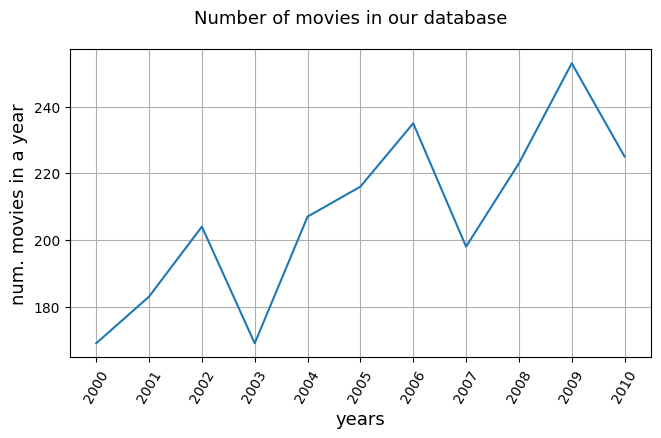

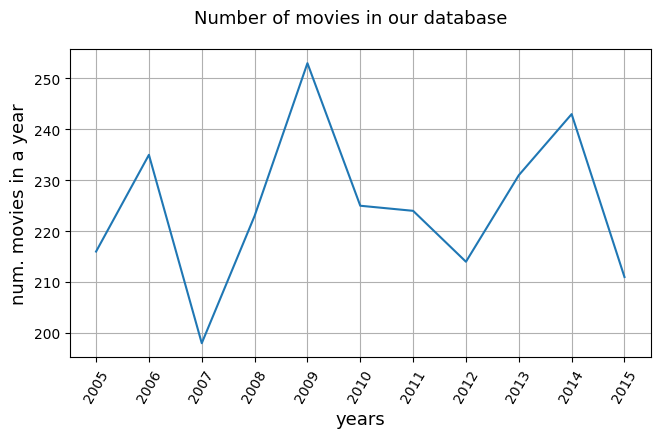

In [34]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

<br>
<font color = "darkblue">

Este apartado es muy parecido al anterior y no se ha hecho nada que sea desconocido a estas alturas de la práctica: se ha creado una lista llamada `list_of_years` con todsos los años en los que han salido películas y que se encuentran en la base de datos. Posteriormente se crea otra lista entre los años que se quieren representar en el eje X. El número de películas de cada año se calcula contando las veces que aparece ese año en `list_of_years`. La representación gráfica sigue los mismos pasos que en el apartado anterior.

<br>

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [35]:
# Esta celda debe ser completada por el estudiante
urls = [list(main_dict_data.values())[i][-1] for i in range(len(list(main_dict_data.values()))) ]

first_url_movie = urls[0]

first_ten_urls = urls[:10]


In [36]:
# Test de funcionamiento

print(len(urls))

print()

print(str(first_url_movie))

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [37]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [38]:
# Esta celda debe ser completada por el estudiante
def soup_movie(url):
    HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }
    html_code = requests.get(url, headers = HEADERS)
    soup = BeautifulSoup(html_code.text, 'lxml')
    return soup

In [39]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1733940470673);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

<br>
<font color = "darkblue">

La función `soup_movie` genera una variable `HEADERS` que evita el error 403 al hacer la petición `requests.get()` mnediante la librería `requests`. Si esta petición se acepta, se devuelve el código html en forma de un archivo de texto llamado `html_code`. posteriormente se aplica la función `BeautifulSoup` sobre dicho archivo para generar el texto que se imprime.

<br>

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [40]:
# Etiqueta completa del título de la película:
title = soup.find('title')
print(title.text)
print()


# Descripción (sólo el contenido):
description = soup.find('meta', {'name': 'description'})['content']
print(description)
print()

# Reparto principal:
cast_list_section = soup.find('section', {'data-testid': 'title-cast'})
cast_html = cast_list_section.find_all('a', {'data-testid': 'title-cast-item__actor'})
cast = [actor.text for actor in cast_html]    
print(cast)
print()

# Presupuesto:
budget = soup.find('div', {'data-testid': 'title-boxoffice-section'}).find('li', class_ = "ipc-inline-list__item").find('span').text
print(budget)
print()

Avatar (2009) - IMDb

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)



<br>
<font color = "darkblue">

Para obtener los datos pedidos basta con hacer Web Scrapping y encontrar las secciones, divisiones, subsecciones, etc. en las que se encuentra cada dato pedido (título, descripción, reparto y presupuesto). Una vez encontradas, se emplean los métodos `.find()`, `find_all()` o `.text` para obtener la información requerida. Las etiquetas de cada sección se han buscado de forma manual en el código fuente de la página, pero se repiten para todas las películas.
<br>

### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [41]:
# Esta celda debe ser completada por el estudiante
def gather_actors(file_name, url_list):
    """
    Returns a file with the names of the actors on each movie linked to each url in url_list.

    Parameters:
    file_name: str
        name of the file to return.
    url_list: list
        list of strings with the urls.
    
    Returns:
    --------
    txt_file: file listing every name for every url.
    """

    def actors(url):
        """
        Returns the actors in a IMDB movie given its link.
        
        Parameters:
        url: str
            link to a IMDB movie web.
        
        Returns:
        --------
        cast: list
            list of strings with the names of the cast.
        """
        soup = soup_movie(url)
        cast_list_section = soup.find('section', {'data-testid': 'title-cast'})
        cast_html = cast_list_section.find_all('a', {'data-testid': 'title-cast-item__actor'})
        cast = [actor.text for actor in cast_html]
        return cast
    
    with open(file_name, 'w') as txt_file:
        for url in url_list:
            for actor in actors(url):
                txt_file.write(actor + '\n')
    return

In [42]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsg�rd
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
L�a Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


<br>
<font color = "darkblue">

Dentro de la función `gather_actors()` se ha definido otra llamada `actors()` que devuelve una lista con el reparto de cada película utilizando el método de Web Scrapping del apartado D3. Para escribir el archivo se recorre la lista de urls y por cada enlace se extrae el reparto de internet. Una vez obtenido el reparto, se recorre la lista de acotores escribiendo cada nombre en el archivo de texto con un salto de línea incluido.

<br>

In [43]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [44]:
# Esta celda debe ser completada por el estudiante
def load_dataframe(csv_file):
    """
    Reads a .csv file and returns it as a DataFrame using Pandas.

    Parameters:
    -----------
    csv_file: str
        name of the file to read as a DataFrame.

    Returns:
    --------
    data_frame: pandas.core.frame.DataFrame
        table with csv_file data
    """
    data_frame = pd.read_csv(csv_file)
    return data_frame

In [45]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [46]:
# Esta celda debe ser completada por el estudiante

def fields_selected_dataframe(data_frame, wanted_columns = ['movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link']):
    """
    Returns certain columns of data_frame as new_data_frame.
    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame to extract columns from.
    wanted_columns: list
        standard parameter. List of columns to extract.
    
    Returns:
    --------
    new_data_frame: pandas.core.frame.DataFrame
        DataFrame containing only certain columns.
    """
    new_data_frame = data_frame[wanted_columns]
    return new_data_frame

In [47]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [48]:
# Esta celda debe ser completada por el estudiante

tabla_breve.columns

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [49]:
# Esta celda debe ser completada por el estudiante
tabla_breve.fillna("Desc", inplace = True)

In [50]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [51]:
# Esta celda debe ser completada por el estudiante

def titulos_de_director_df(data_frame, name):
    """
    Returns every movie whose director is 'name'.

    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame with at least two columns called 'director_name' and 'movie_title'.
    name: str
        name of the director whose movies are returned.
    
    Returns:
    --------
    movies_from_director_df: pandas.core.frame.DataFrame
        DataFrame with every movie directed by 'director_name' = name.
    """
    movies_series = data_frame[data_frame['director_name'] == name]
    movies_from_director_df = pd.DataFrame(movies_series['movie_title'])
    return movies_from_director_df

In [52]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [53]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [54]:
t = pd.DataFrame(tabla_breve['director_name'].value_counts().reset_index())
t.head()
# t.drop(t['director_name'] == 'Desc')

,director_name,count
0,Desc,104
1,Steven Spielberg,26
2,Woody Allen,22
3,Clint Eastwood,20
4,Martin Scorsese,20


In [55]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies_df(data_frame):
    """
    Returns the highest movie count director in data_frame.

    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame containing information about movies.
    
    Returns:
    --------
    top_director: str
        name of the director with the most movies directed
    top_director_movies: int
        movie count for top_director
    
    Example:
    --------
    >>> directors_max_movies_df(tabla_breve)

    ('Steven Spielberg', 26)
    """
    directors_movie_count = pd.DataFrame(tabla_breve['director_name'].value_counts().reset_index())
    if directors_movie_count['director_name'][0] == 'Desc':
        top_director = directors_movie_count['director_name'][1]
        top_director_movies = directors_movie_count['count'][1]
    else:
        top_director = directors_movie_count['director_name'][0]
        top_director_movies = directors_movie_count['count'][0]


    return top_director, int(top_director_movies)


In [56]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

('Steven Spielberg', 26)

<br>
<font color = "darkblue">

En las secciones del apartado E se han llevado a cabo los procesos siguientes:

- Apartado E1: para cargar el archivo `.csv` basta con hacer uso de la librería `pandas` (o `pd`) y su función `pd.read_csv()`.

- Apartado E2: para obtener un DataFrame con únicamente las columnas indicadas, es suficiente con introducir una lista con las cabeceras de las columnas como coordenada del DataFrame. La lista debe contener las cabeceras en formato `str`.

- Apartado E3: las columnas de un DataFrame se obtienen fácilmente con el método `.columns` asociado a la clase `pandas.core.frame.DataFrame`.

- Apartado E4: el método `.fillna()` permite sustituir los valores leídos como `NaN` por el tipo de variable que se desee. Por tanto, con la instrucción `tabla_breve.fillna("Desc", inplace = True)` basta para conseguirlo. El argumento `inplace = True` no es necesario, pero más adelante se emplea de nuevo la variable `tabla_breve` por lo que esto evita reasignar el DataFrame a ese nombre.

- Apartado E5: combinando los métodos `.value_counts()` y `reset_index()` se obtiene un nuevo DataFrame llamado `directors_movie_count` que contiene los nombres de los directores (sin repetirse) y el número de veces que aparece cada uno (el número de películas que han dirigido). Antes de devolver la tupla con la mayor cuenta de películas se comprueba si este director tiene como nombre la cadena `'Desc'`, ya que anteriormente se ha visto que hay alrededor de 100 películas que no tienen datos en la columna del director.

<br>

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [57]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["UK", "Australia"], 86000000]
"Arabic"	[["Egypt", "Turkey", "France", "Germany", "United Arab Emirates"], 11224999]
"Aramaic"	[["USA"], 30000000]
"Bosnian"	[["USA"], 13000000]
"Cantonese"	[["Hong Kong", "USA", "China"], 154499998]
"Chinese"	[["China"], 11999998]
"Czech"	[["Czech Republic"], 84450000]
"Danish"	[["Denmark"], 50099998]
"Dari"	[["USA", "Afghanistan"], 20046000]
"Dutch"	[["Netherlands"], 32150000]
"Dzongkha"	[["Australia"], 1800000]
"English"	[["", "South Africa", "Slovakia", "Russia", "Panama", "Canada", "Bahamas", "Iran", "Chile", "Mexico", "Belgium", "India", "Italy", "Spain", "Greece", "New Line", "Switzerland", "Kyrgyzstan", "France", "Georgia", "Iceland", "Australia", "Germany", "Japan", "New Zealand", "Brazil", "Philippines", "West Germany", "Hungary", "Bulgaria", "Ireland", "Netherlands", "Norway", "Poland", "Cambodia", "Czech Republic", "Official site", "Peru", "Libya", "UK", "Thailand", "China", "Denmark", "South Korea", "Aruba", "Nigeria", "Romania

In [58]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [59]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob

def to_int(cadena):
    try:
        return int(cadena)
    except:
        return 0

class MRLanguageBudgetCountries(MRJob):

    def mapper(self, _, line):
        fields = line.strip().split('|')
        _, _, language, country, budget = fields
        if language != '':
            yield language, (country, to_int(budget))

    def reducer(self, language, values):
        
        countries = set()
        total_budget = 0

        for country, budget in values:
            countries.add(country)
            total_budget += budget

        yield language, (list(countries), total_budget)

if __name__ == "__main__":
    MRLanguageBudgetCountries.run()

<br>
<font color = "darkblue">

Como se puede observar en la salida de la última celda, para obtener esta información mediante la técnica map-reduce se ha diseñado un mapper que extrae los tres campos de interés de cada línea (idioma, país y presupuesto) y proporciona una tupla de la forma: `(language, (country, budget))`. Posteriormente, se ha creado una función reductora que, por cada idioma, inicializa un diccionario y un sumatorio (vacío y nulo respectivamente) y va introduciendo todos los países nuevos y añadiendo el presupuesto al sumatorio por cada tupla `(country, budget)` que hay en los valores devueltos por el mapper. El método `.add` permite no tener que comprobar si el país que se va a añadir al diccionario ya se encuentra en él.

<br>

# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="darkblue">

En este apartado se llevará a cabo un análisis de datos sobre las relaciones entre la puntuación de las películas, su duración, y los distintos géneros bajo los que se puede clasificar cada una. Para ello se utilizará la librería `pandas`, así como otras librerías gráficas distintas de `matplotlib.pyplot`, como pueden ser `plotly_express` o `seaborn`. La finalidad es la obtención de un análisis visual que permita reconocer patrones o tendencias en la base de datos.

<br>

In [60]:
# Este apartado debe ser completado por el estudiante
def genre_analysis(data_frame):
    """
    Returns an interactive graph of genre tendencies using pandas and plotly libraries.

    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame containing information about movies (title, year, genres, duration, 'gross' and IMDB score, at least)
    """
    columns = ['movie_title', 'title_year', 'genres', 'duration', 'gross', 'imdb_score']
    df_wanted_fields = fields_selected_dataframe(data_frame, columns)
    df_wanted_fields['genres'] = df_wanted_fields['genres'].str.split('|')

    df_genres = df_wanted_fields.explode('genres').reset_index(drop=True)
    df_genres = df_genres.dropna(subset = ['title_year', 'genres'])

    tendencies = df_genres.groupby(['title_year', 'genres']).size().unstack(fill_value=0)

    tendencies = tendencies.reset_index()
    tendencies

    genre_graph = px.area(tendencies, x='title_year', y=tendencies.columns[1:], title="Tendencias de Géneros de Películas a lo Largo del Tiempo", 
                  labels={"title_year": "Año", "value": "Número de Películas"}, color_discrete_sequence = px.colors.qualitative.Plotly)

    genre_graph.update_layout(xaxis_title="Año", yaxis_title="Número de Películas", legend_title="Géneros")
    genre_graph.show()
    return


def duration_analysis(data_frame):
    """
    Returns a scatter graph of imbd_score vs duration using pandas and the seaborn library.

    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame containing information about movies (title, year, genres, duration, 'gross' and IMDB score, at least)
    """
    columns = ['movie_title', 'title_year', 'genres', 'duration', 'gross', 'imdb_score']
    data_frame = tabla_completa[columns]
    df_wanted_fields = fields_selected_dataframe(data_frame, columns)
    df_wanted_fields = df_wanted_fields.dropna(subset = ['duration', 'imdb_score'])
    duration_graph = plt.figure()

    slope, intercept, r, p, sterr = stats.linregress(x = df_wanted_fields['duration'],
                                        y = df_wanted_fields['imdb_score'])
    seaborn.regplot(data = df_wanted_fields, x = 'duration', y = 'imdb_score', scatter_kws={'s':5}, line_kws={"color":"red"})
    plt.text(350, 4, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
    plt.text(385, 3, 'r = ' + str(round(r,3)))
    plt.legend(['Películas', 'Recta de regresión lineal'])
    plt.title("Relación entre la puntuación de una película y su duración")
    plt.xlabel("Duración (min)")
    plt.ylabel("Puntuación en IMDB")
    duration_graph.show()

    return

def genres_and_duration_analysis(data_frame):
    """
    Returns one subplot of for imbd_score vs duration each genre.

    Parameters:
    -----------
    data_frame: pandas.core.frame.DataFrame
        DataFrame containing information about movies (title, year, genres, duration, 'gross' and IMDB score, at least)
    """

    columns = ['movie_title', 'title_year', 'genres', 'duration', 'gross', 'imdb_score']
    df_wanted_fields = fields_selected_dataframe(data_frame, columns)
    df_wanted_fields['genres'] = df_wanted_fields['genres'].str.split('|')

    df_genres = df_wanted_fields.explode('genres').reset_index(drop=True)
    df_genres = df_genres.dropna(subset = ['title_year', 'genres'])

    duration_and_genre_graph = seaborn.FacetGrid(df_genres, col='genres', col_wrap=4, height=3, sharex=True, sharey=True)
    duration_and_genre_graph.map(seaborn.regplot, 'duration', 'imdb_score', scatter_kws={'s':5}, line_kws={"color":"red"})
    duration_and_genre_graph.set_axis_labels("Duración (minutos)", "Puntuación IMDb")
    plt.suptitle("Relación entre la puntuación de una película y su duración dependiendo del género", y=1.02, fontsize = 15)
    plt.show()
    return

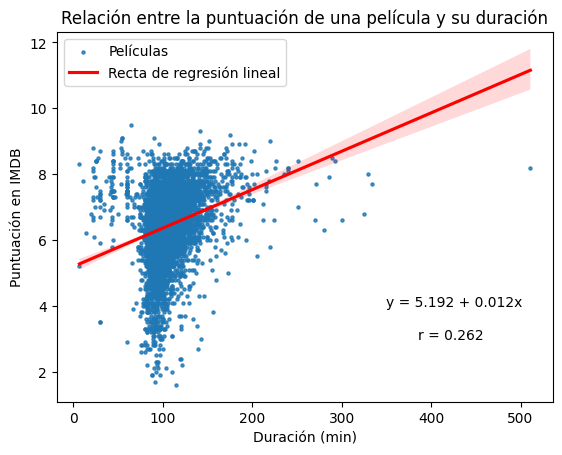

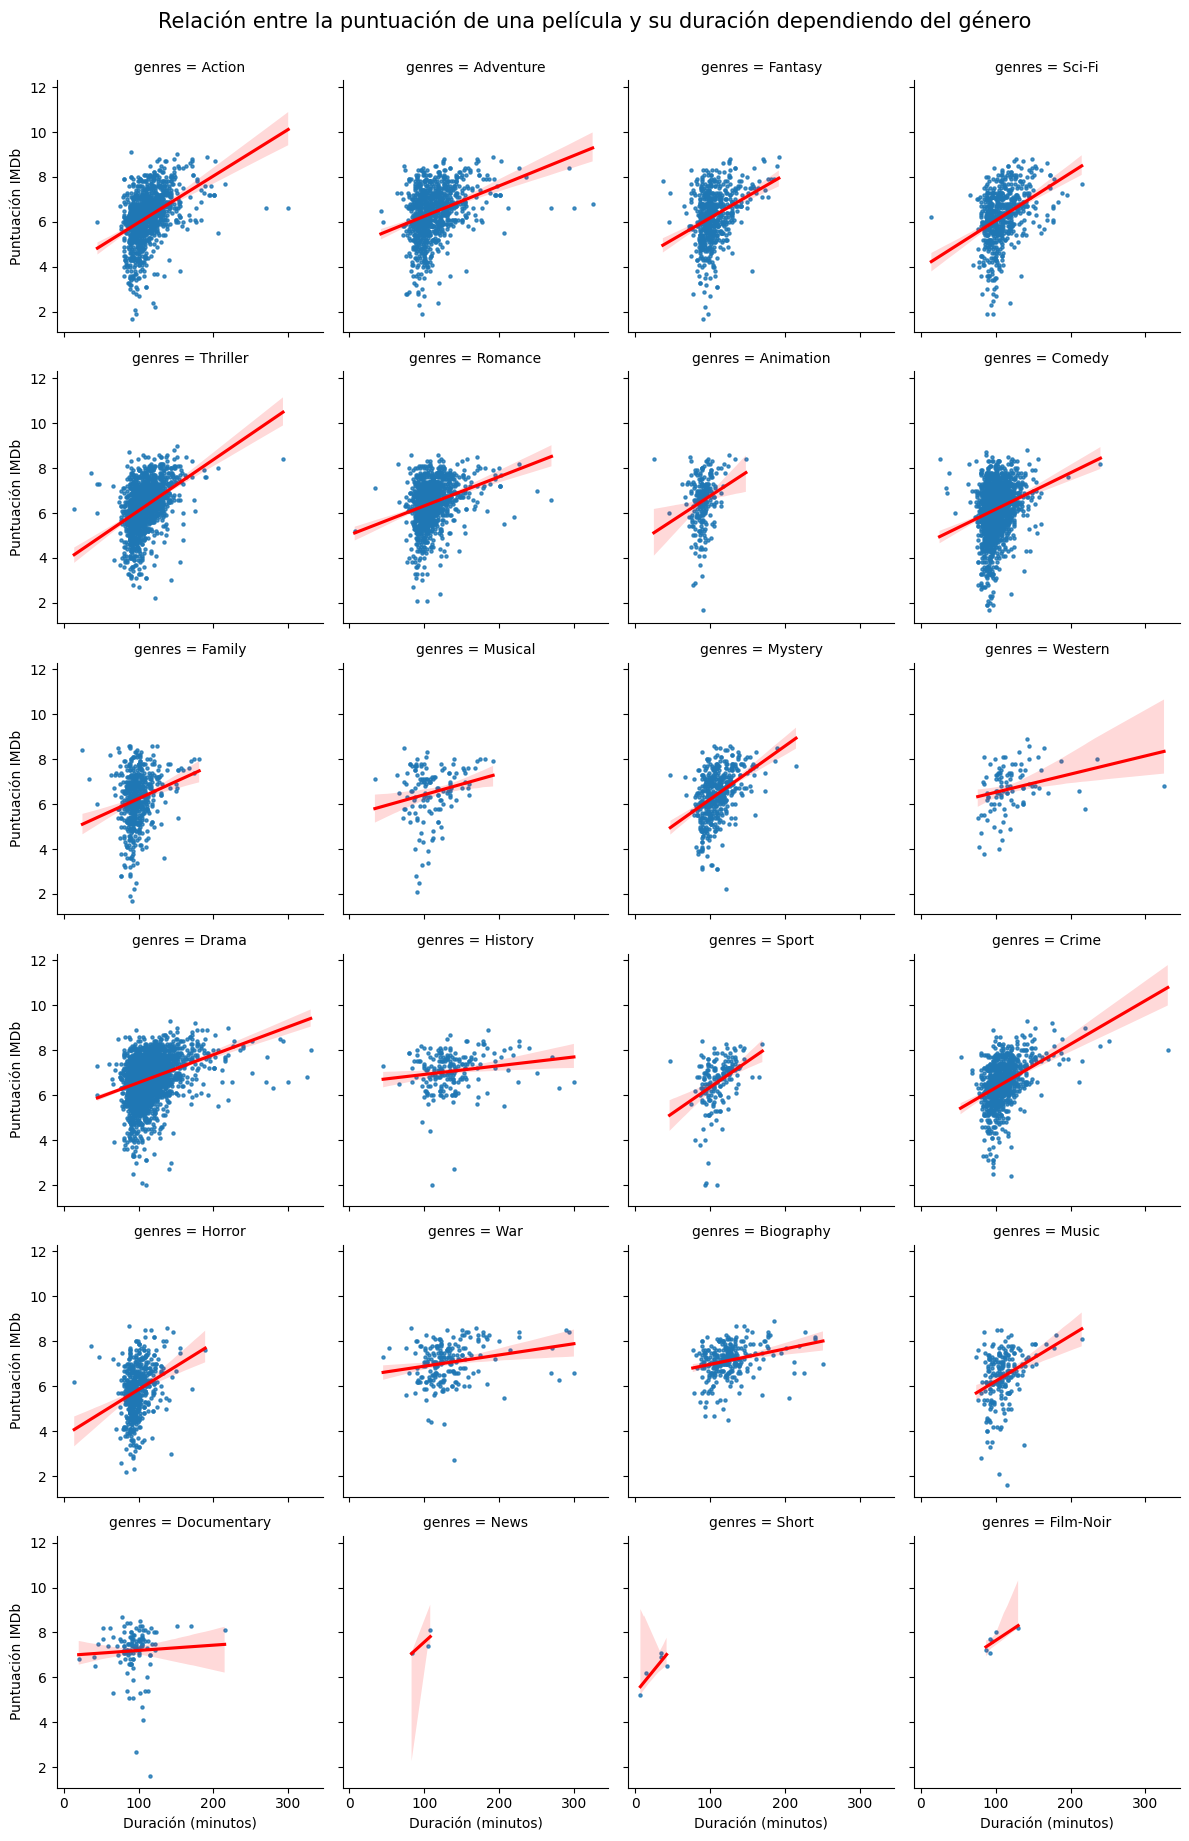

In [61]:
# Pruebas de funcionamiento, también tarea del estudiante:
genre_analysis(tabla_completa)

duration_analysis(tabla_completa)

genres_and_duration_analysis(tabla_completa)

<br>

<font color="darkblue">

Para la obtención del análisis deseado se ha hecho uso de las librerías ya mencioandas.

- Gráfico 1:

    - Esta imagen muestra un gráfico interactivo que permite ver, además de la evolución del número de películas con los años, cúantas de estas se clasifican bajo una cierta etiqueta de género, como por ejemplo 'Drama' o 'Action'. Además, permite situar el cursor encima de un punto cualquiera para ver cúantas películas de la base de datos se corresponden a ese año y a ese género. NOTA: la librería `plotly_express` hace uso de otra llamada `nbformat`, que ha sido necesario instalar y actualizar (las dos cosas). Para ello se han ejecutado los comandos `pip install nbformat`, `pip install --upgrade nbformat` y `pip install rpds-py==0.18.1` (además de tener que reiniciar el kernel de jupyter y VScode). Además, este gráfico no se encuentra en el PDF porque no es posible exportarlo, pero es ejecutable en el archivo .ipynb.

    - El proceso para obtenerlo ha sido el siguiente: se han extraído las columnas deseadas en `df_wanted_fields` con la función `fields_selected_dataframe` del apartado E. Después, se han separado las strings de los géneros separadas por '|' para que cada subgénero sea un elemento y se ha expandido el DataFrame con el método `.explode()` para que cada película se repita n veces pero con un subgénero distinto en cada fila (siendo n el número de subgéneros de cada película). También se han eliminado los valores 'NaN' con el método `.dropna()`. Por último se ha hecho el gráfico con `plotly_express.area()` y se han añadido las etiquetas.

    - Se puede observar que el número de películas en la base de datos aumenta considerablemente a partir del año 1990 (probablemente debido al desarrollo de la industria del cine). También se puede ver que comienza ha haber períodos (picos) con mayor número de películas registradas de aproximadamente dos años. También hay más variedad en los géneros, auqnue dominan 'Drama' y 'Comedia' por lo general.

- Gráfico 2:
    - Esta figura se ha creado con las librerías `scipy` y `seaborn`, que permiten representar gráficos de dispersión junto con los datos de su regresión lineal (ecuación, parámetro r, franja de error de la recta, etc).
    - En el gráfico se puede observar que no existe una relación clara entre la valoración de una película y su duración (independientemente del género de la misma), ya que el valor del coeficiente r del ajuste es muy pobre.
- Gráfico 3:
    - Esta figura se ha hecho combinando ambos métodos y gracias a la función `seaborn.FacetGrid` y al método `.map()`, que permiten hacer varios subplots de golpe.
    - Se puede apreciar que, aunque un ajuste lineal no es lo indicado para este tipo de relación (ya que duración 'infinita' no supone una valoración 'infinita'), no hay una relación clara entre las valoraciones de las películas y su duración.



<br>

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** González Perea
-   **Nombre:** Jorge
-   **Email:** jorggo16@ucm.es
-   **Fecha:** 12/11/2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.5  / 2.5  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto |
|d)  |1.0 / 1.0  |Completamente resuelto |
|e)  |2.0  / 2.0  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.4  / 0.5  |Completamente resuelto |
|**Total** |**9.9** / 10.0|**Sobresaliente**|

</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="darkblue">

Los conocimientos necesarios para el desarrollo de las funciones de esta práctica se han obtenido en gran medida a partir de la documentación aportada por el profesor, como por ejemplo el uso de las librerías `requests` y `bs4` para hacer Web Scrapping, o la escritura de archivos .py para hacer uso de la técnica map-reduce. Otras fuentes han sido foros de computación como Stack Overflow, que han sido utilizados para comprobar el funcionamiento, documentación y sintaxis de distintas funciones y métodos empleados, así como de numerosas librerías (`seaborn`, `plotly` o `plotly_express`, etc).

Bibliografía:

- Stack Overflow: https://stackoverflow.com/
- MatPLotLib: https://matplotlib.org/
- Pandas: https://pandas.pydata.org/
- Plotly: https://plotly.com/

Otras páginas empleadas:

- https://statology.org/
- https://imdb.com/
- https://doc.python.org/


</font>

<br>

<font color="black">

<br>

In [71]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor